In [1]:
import mglearn
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
print("Cluster memberships:\n{}".format(kmeans.labels_))
print(np.all(np.array(kmeans.predict(x)) == np.array(kmeans.labels_)))
a = [[42,-42,42],[-1,1,42]]
b = [-1,1,42]


Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
True


## Kmeans Implementation

In [9]:
from matplotlib import pyplot as plt

points1 = [0,108,279,312,476,556,594,618,678,702]
points2 = [818,962,1136,1479,1747,1925,2064,2100,2164,2315]
points3 = [2359,2415,2516,2606,2671,2747,2887,2970,3014,3053]
points = points1 + points2 + points3

n = len(points) # nr. of points
k = 3 # nr. of clusters
print(n)


30
Initial centroids [508.8333333333333, 1526.5, 2544.1666666666665]


Finding centroids by sorting

In [10]:
# take the first and last and divide into 
interval = (points[-1] + points[0])/float(k)
centroids = []
for i in range(k):
    centroids.append(points[0] + i*interval + interval/2)
print('Initial centroids {}'.format(centroids))

Initial centroids [508.8333333333333, 1526.5, 2544.1666666666665]


Finding centroids randomly

In [14]:
import random

centroids = []
random.seed(42)
for i in range(k):
    centroids.append(random.uniform(points[0], points[-1]))
centroids.sort()
print('Initial centroids:', centroids)

Initial centroids: [76.35783569480216, 839.6645089809211, 1952.1700156919192]


Finding center of mass.

In [23]:
closest = [0]*n

'''Start kmeans iteration'''
for i in range(n):
    distances = []
    for j in range(k):
        distances.append(abs(points[i] - centroids[j]))
    closest[i] = distances.index(min(distances))
print('Closest centroid:', closest)

'''Find new centroids for each of k sets of points'''
summation = [0]*k
counter = [0]*k

for i in range(n):
    summation[closest[i]] += points[i]
    counter[closest[i]] += 1

for j in range(k):
    if counter[j] == 0: print('Error - empty set')
    else: centroids[j] = summation[j]/float(counter[j])
print('New centroids: ', centroids)

Closest centroid: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
New centroids:  [174.75, 801.9, 2472.0625]


Visualization

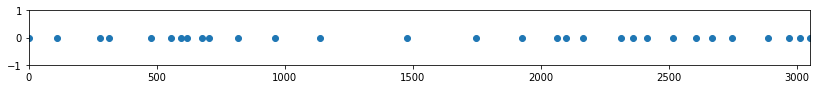

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,1))
plt.ylim(-1, 1)
plt.xlim(0, points[-1])
plt.plot(points, [0]*n, 'o')
plt.show()


 30 Data points:  [0, 108, 279, 312, 476, 556, 594, 618, 678, 702, 818, 962, 1136, 1479, 1747, 1925, 2064, 2100, 2164, 2315, 2359, 2415, 2516, 2606, 2671, 2747, 2887, 2970, 3014, 3053]
Initial centroids: [1074.1866190425258, 1313.3586090077692, 1385.05714653897]
ERROR - Empty set!
  Final centroids: [838.1111111111111, 235.0, 2472.0625]


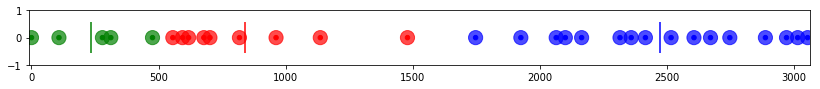

In [ ]:
import random
from matplotlib import pyplot as pp

points1 = [0,108,279,312,476,556,594,618,678,702]
points2 = [818,962,1136,1479,1747,1925,2064,2100,2164,2315]
points3 = [2359,2415,2516,2606,2671,2747,2887,2970,3014,3053]
points = points1 + points2 + points3
n = len(points)     #nr. of points
print('\n', n, 'Data points: ', points)
print
k = 3               #nr. of clusters

def D_sqr(centers, poin, closests):
    k = len(centers)
    n = len(poin)
    s = 0.0
    for i in range(k):
        for j in range(n):
            if i == closests[j]:
                s += (center[i] - poin[j])**2
    return s

interval = (points[-1] + points[0])/float(k)
centroids = []
'''for i in range(k):  #calculate the midpoint of each interval
    centroids.append(points[0] + i*interval + interval/2)'''
centroids = []
random.seed(47)     #for repeatability
for i in range(k):  
    centroids.append(random.uniform(points[0], points[-1]))
centroids.sort()
print('Initial centroids:', centroids)

closest       = [0]*n     #list of n zeros
new_centroids = [0]*k
change = 1.0

while change > 1e-4:    #main loop of K-means iteration
    #for each point, find which centroid is closest
    for i in range(n):
        distances = []
        for j in range(k):
            distances.append(abs(points[i]-centroids[j]))
        closest[i] = distances.index(min(distances))    #index where min occurs
    #print ' Closest centroid:', closest
    #find new centroids for each of k sets of points
    summation  = [0]*k
    counter    = [0]*k
    difference = [0]*k
    for i in range(n):
        summation[closest[i]] += points[i]
        counter[closest[i]] += 1
    for j in range(k):
        if counter[j] == 0:
            print('ERROR - Empty set!')
            exit(0)
        else:
            new_centroids[j] = summation[j]/float(counter[j])
            difference[j] = abs(new_centroids[j] - centroids[j])
    change = sum(difference)
    #print change
    #print '    New centroids:', centroids
    centroids = new_centroids[:]
#end of K-means iterations
print('  Final centroids:', centroids)    

#for each point, find which of the  final centroids is closest
for i in range(n):
    distances = []
    for j in range(k):
        distances.append(abs(points[i]-centroids[j]))
    closest[i] = distances.index(min(distances))    #index where min occurs
#print ' Closest centroid:', closest  

colors = []
for i in range(n):
    if closest[i] == 0:
        colors.append('r')
    elif closest[i] == 1:
        colors.append('g')
    elif closest[i] == 2:
        colors.append('b')
    elif closest[i] == 3:
        colors.append('y')
    elif closest[i] == 4:
        colors.append('brown')
    else:
        print('Invalid color - extend the list of colors!!')

pp.figure(figsize=(14, 1))   
pp.scatter(points   , [0]*len(points)   , c=colors, s=200, alpha=0.7)
pp.scatter(points   , [0]*len(points)   , c=colors, s=20, alpha=1)
pp.scatter(centroids, [0]*len(centroids), c=['r','g','b','y','brown'],
           s=1000, marker='|')
pp.ylim(-1, 1)
pp.xlim(0-10, points[-1]+10)

pp.show()





### Modified KMeans


 30 Data points:  [   0  108  279  312  476  556  594  618  678  702  818  962 1136 1479 1747
 1925 2064 2100 2164 2315 2359 2415 2516 2606 2671 2747 2887 2970 3014 3053]

  Final centroids: [235.0, 2472.0625, 838.11111111111109]


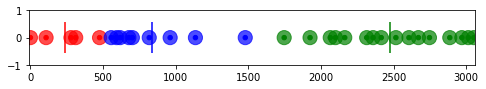

In [6]:
import random
import numpy as np
from matplotlib import pyplot as pp

points1 = [0,108,279,312,476,556,594,618,678,702]
points2 = [818,962,1136,1479,1747,1925,2064,2100,2164,2315]
points3 = [2359,2415,2516,2606,2671,2747,2887,2970,3014,3053]
arr_points = np.array(points1 + points2 + points3)
n = len(arr_points)     #nr. of points
print('\n', n, 'Data points: ', arr_points)
print()
k = 3               #nr. of clusters

def D_sqr(cent, poin, clos):
    k = len(cent)
    n = len(poin)
    s = 0.0
    for i in range(k):  #for each center
        for j in range(n):
            if i == clos[j]:
                s += (cent[i]-poin[j])**2
    return s   

interval = (points[-1] + points[0])/float(k)
centroids = []
'''for i in range(k):  #calculate the midpoint of each interval
    centroids.append(points[0] + i*interval + interval/2)'''
centroids = []
random.seed(49)     #for repeatability
for i in range(k):  
    centroids.append(random.uniform(points[0], points[-1]))
#centroids.sort()
#print('Initial centroids:', centroids)

closest       = np.zeros_like(arr_points, dtype='int16')    #list of n zeros
new_centroids = [0]*k
change = 1.0

while change > 1e-4:    #main loop of K-means iteration
    #for each point, find which centroid is closest
    for i in range(n):
        distances = []
        for j in range(k):
            distances.append(abs(points[i]-centroids[j]))
        closest[i] = distances.index(min(distances))    #index where min occurs
    #print ' Closest centroid:', closest
    #find new centroids for each of k sets of points
    summation  = [0]*k
    counter    = [0]*k
    difference = [0]*k
    for i in range(n):
        summation[closest[i]] += arr_points[i]
        counter[closest[i]] += 1
    for j in range(k):
        if counter[j] == 0:
            print('ERROR - Empty set!')
            exit(0)
        new_centroids[j] = summation[j]/float(counter[j])
        difference[j] = abs(new_centroids[j] - centroids[j])
    change = sum(difference)
    #print change
    #print '    New centroids:', centroids
    centroids = new_centroids[:]
#end of K-means iterations
print('  Final centroids:', centroids)   

#for each point, find which of the  final centroids is closest
for i in range(n):
    distances = []
    for j in range(k):
        distances.append(abs(arr_points[i]-centroids[j]))
    closest[i] = distances.index(min(distances))    #index where min occurs
#print ' Closest centroid:', closest  

colors = []
for i in range(n):
    if closest[i] == 0:
        colors.append('r')
    elif closest[i] == 1:
        colors.append('g')
    elif closest[i] == 2:
        colors.append('b')
    elif closest[i] == 3:
        colors.append('y')
    elif closest[i] == 4:
        colors.append('brown')
    else:
        print('Invalid color - extend the list of colors!!')

pp.figure(figsize=(8, 1))   
pp.scatter(arr_points   , [0]*len(arr_points)   , c=colors, s=200, alpha=0.7)
pp.scatter(arr_points   , [0]*len(arr_points)   , c=colors, s=20, alpha=1)
pp.scatter(centroids, [0]*len(centroids), c=['r','g','b','y','brown'],
           s=1000, marker='|')
pp.ylim(-1, 1)
pp.xlim(0-10, points[-1]+10)

pp.show()





### 2d Kmeans

In [3]:
import random
import numpy as np
from matplotlib import pyplot as pp

with open('kmeans.txt','r') as f:
    li = f.readlines()
    
a = np.array(list(map(float,li[0].split(','))))
for i in range(1,len(li)):
    temp = li[i].split(',')
    try:
        b = np.array(list(map(float,temp)))
        a = np.hstack((a,b))
    except ValueError:
        print('Conversion Error!')

print(a)
print(a.shape)



[    0.   108.   279.   312.   476.   556.   594.   618.   678.   702.
   818.   962.  1136.  1479.  1747.  1925.  2064.  2100.  2164.  2315.
  2359.  2415.  2516.  2606.  2671.  2747.  2887.  2970.  3014.  3053.]
(30,)
